# 시계열

## 독립변인(X)이 "시간" 또는 "연속"
- "달, 온도, 강 수위, 수확량, 햇빛"
- "교육, 의료, 기후, 마케팅"

## 목적: (t+1)을 알고 싶음
- "수학, 통계, 확률" => "무작위 프로세스"

## 목적: (t+k)을 알고 싶음
- 대규모 데이터를 처리 => "무작위 프로세스" => 고전 모델
- 대규모 데이터를 처리 => 딥러닝 => 딥러닝 모델(RNN을 기반으로 한 모델) *CNN과 달리 이전 데이터에 영향을 많이 받음

## 시계열 예측 => "시계열 모델"
- 시계열의 주요 특징인 주기성과 특정 값 내의 변동을 처리한 데이터를 활용
- 시계열 모델을 생성하는 것으로 가정

## 시계열 특징
- 주기 *시계열은 주기성을 파괴하지 않으면 안 됨
- 특정 값 내의 변동 *이것도 삭제해야 함

## 시계열 문제
- 예측
- 이상 탐지

## 무작위 행보

> 이론적 시계열 모델은 무작위성을 가진다고 가정합니다. 그런데, 컴퓨터는 그렇지 않습니다.

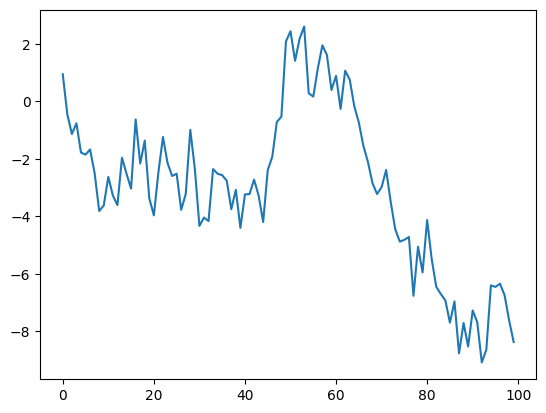

In [105]:
import matplotlib.pyplot as plt
import random

def generate_random_walk(length=100, mu=0, sig=1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i-1] + e) # 이전 값에 e를 더함 => 시계열은 처음이 중요함 *** 시계열은 이전 데이터에 영향을 받는다!!!!!!!!!!!!

    return ts
random.seed(0)
random_walk = generate_random_walk()
plt.plot(random_walk)
plt.show()

## 추세(Trend)

> 전역 시계열 방향

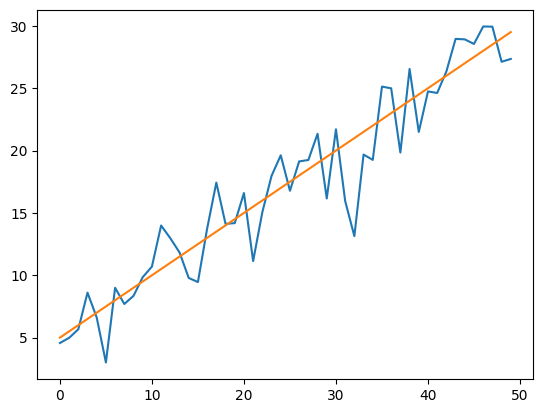

In [106]:
random.seed(42)
length = 50
A = 5
B = 0.5
C = 3
trend = [A + B * i for i in range(length)]
noise = [C * random.gauss(0,1) for i in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

## 계절성

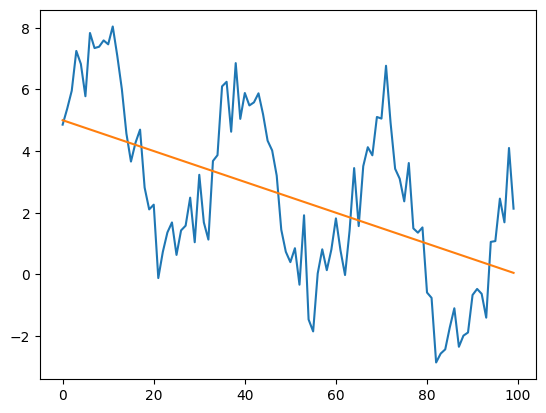

In [107]:
import math
random.seed(42)
length = 100
A = 5
B = -0.05
C = 1
S = 3
trend = [A + B * i for i in range(length)]
seasons = [S * math.sin(i / 5) for i in range(length)]
noise = [C * random.gauss(0,1) for i in range(length)]
ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

In [109]:
from statsmodels.tsa.ar_model import AutoReg # AR 모델
import FinanceDataReader as fdr

quotes = fdr.DataReader("AAPL", "2011-01-01", "2024-12-31")
model = AutoReg(quotes["Close"], lags=2)
model_fit = model.fit()
print(model_fit.params)

# AAPL 애플의 다음날 주가 가격은? 0.023316 + (0.985331 * 애플의 오늘 주가) + (0.015291 * 애플의 어제 주가)

const       0.023316
Close.L1    0.985331
Close.L2    0.015291
dtype: float64


C:\Users\user\AppData\Local\Programs\Python\Python39\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## ARIMA
- AR 모델의 고급 형태
- 관측값(y)과 지연된 관측값(lags 또는 p)에 적용된 이동 평균 모델(MA)의 잔차/오차 사이의 종속성을 포함

In [111]:
from statsmodels.tsa.arima.model import ARIMA
import FinanceDataReader as fdr

from_data = "2015-1-1"
to_data = "2020-10-1"
quotes = fdr.DataReader("AAPL", start=from_data, end=to_data)
closes = quotes["Close"].values

train, test = closes[:-1], closes[-1]
model = ARIMA(train, order=(5,2,3))
result = model.fit()
forecast = result.forecast()
predicted = forecast[0]
print(predicted, test)

C:\Users\user\AppData\Local\Programs\Python\Python39\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Local\Programs\Python\Python39\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\AppData\Local\Programs\Python\Python39\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


114.18987562163126 115.80999755859375


In [ ]:
# model = ARIMA(train, order=(p,d,q))
# model = ARIMA(train, order=(5,2,3))
# box-jenkins
# p: AR차수 => PACF #
# d: 차분 => 만약 정상성이 아니라면 차분을 하는데 회수, p-value < 0.5
# q: 어 ....

np.float64(0.9985694446816749)

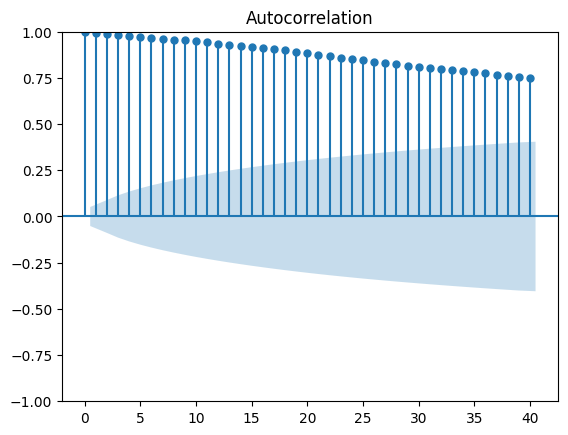

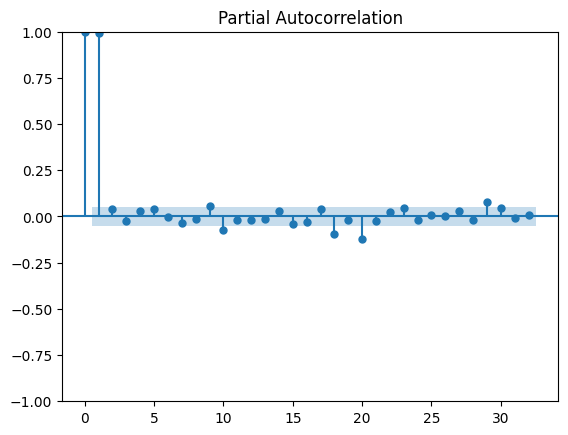

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import numpy as np

# plot_acf(closes, lags=40)
# plot_pacf(closes)
# result = adfuller(closes)
# result[1] # p-value : 작을 수록 굿

# 차분
# diff_closes = np.diff(closes, n=2)
# result = adfuller(diff_closes)
# result[1] > 0.05

## 고전적 모델 : 장점
- 인기있고, 안정적임

## 단점
- 단일 변수 시계열에서만 작동
- (*)장기 예측이 안 됨

## 딥러닝을 활용해서 시계열 문제를 해결 할 수 있어?

- 슬라이딩 윈도우(Pandas, 슬라이딩 윈도우, shift)
- 전처리/후처리
    - 전처리 중 가장 중요한 것 n/a : fillna(df.mean()), interpolate, bfill, ffill
    - 후처리 중 가장 중요한 것 정규화, 추세 제거, 차분

## RNN을 사용한 시계열 문제 해결

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset, random_split

from sklearn.preprocessing import MinMaxScaler

### 1. 데이터 불러오기

In [134]:
df = pd.read_csv("data/SBUX.csv")
X = df["Date"] # 문자열
y = df["Close"]

In [144]:
class SBUXDataset(Dataset):
    def __init__(self, csv_file="data/SBUX.csv", seq_length=2, is_train=True):
        self.seq_length = seq_length
        self.is_train = is_train
        # 데이터 로드
        df = pd.read_csv(csv_file)
        data = df["Close"].values.reshape(-1, 1)
        # 데이터 정규화
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(data)
        # 시퀀스 데이터 생성
        X, y = self._create_seq(scaled_data, seq_length)
        # 학습 및 테스트 데이터 분리/인덱스 계산
        train_size = int(len(X)*0.8)
        if self.is_train:
            self.X = torch.FloatTensor(X[:train_size])
            self.y = torch.FloatTensor(y[:train_size])
            self.datas = df["Date"].iloc[self.seq_length: train_size + self.seq_length] # 시퀀스 길이를 고려한 날짜
        else:
            self.X = torch.FloatTensor(X[train_size:])
            self.y = torch.FloatTensor(y[train_size:])
            self.datas = df["Date"].iloc[train_size + self.seq_length:]

    def _create_seq(self, data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i: i+seq_length]
            y = data[i+seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [146]:
seq_length = 10
batch_size = 16

In [147]:
train_dataset = SBUXDataset(seq_length=seq_length, is_train=True)
test_dataset = SBUXDataset( seq_length=seq_length, is_train=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [151]:
for i in train_loader:
    print(i[0].shape, i[1].shape)

torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([2, 10, 1]) torch.Size([2, 1])


### 2. 전처리

### 3. 학습

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNNCell(input_size, output_size)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        batch_size = x.size(0)
        h_t = torch.zeros(batch_size, self.hidden_size).to(x.device)

        for t in range(x.size(1)):
            h_t = self.rnn_cell(x[:, t, :], h_t) # 기존 셀과 이전 셀
        output = self.fc(h_t)
        return output

### 4. 평가

In [163]:
n_feat = 2
hidden_dim = 2

torch.manual_seed(19)


rnn_cell = nn.RNNCell(input_size=n_feat, hidden_size=hidden_dim)
rnn_state = rnn_cell.state_dict()
rnn_state

OrderedDict([('weight_ih',
              tensor([[ 0.6627, -0.4245],
                      [ 0.5373,  0.2294]])),
             ('weight_hh',
              tensor([[-0.4015, -0.5385],
                      [-0.1956, -0.6835]])),
             ('bias_ih', tensor([0.4954, 0.6533])),
             ('bias_hh', tensor([-0.3565, -0.2904]))])